# Anomaly Detection

### Importing the Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.anomaly import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [3]:
numeric = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
categorical = ['Channel','Region']

replace_dict = { "Channel": {1: "Horeca", 2: "Retail"},
                 "Region":  {1: "Lisbon", 2: "Oporto", 3: "Other"} }

data = get_data('wholesale', verbose = False)
data.replace(replace_dict, inplace = True) 
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
5,Retail,Other,9413,8259,5126,666,1795,1451
6,Retail,Other,12126,3199,6975,480,3140,545
7,Retail,Other,7579,4956,9426,1669,3321,2566
8,Horeca,Other,5963,3648,6192,425,1716,750
9,Retail,Other,6006,11093,18881,1159,7425,2098


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


### Exploratory Data Analysis

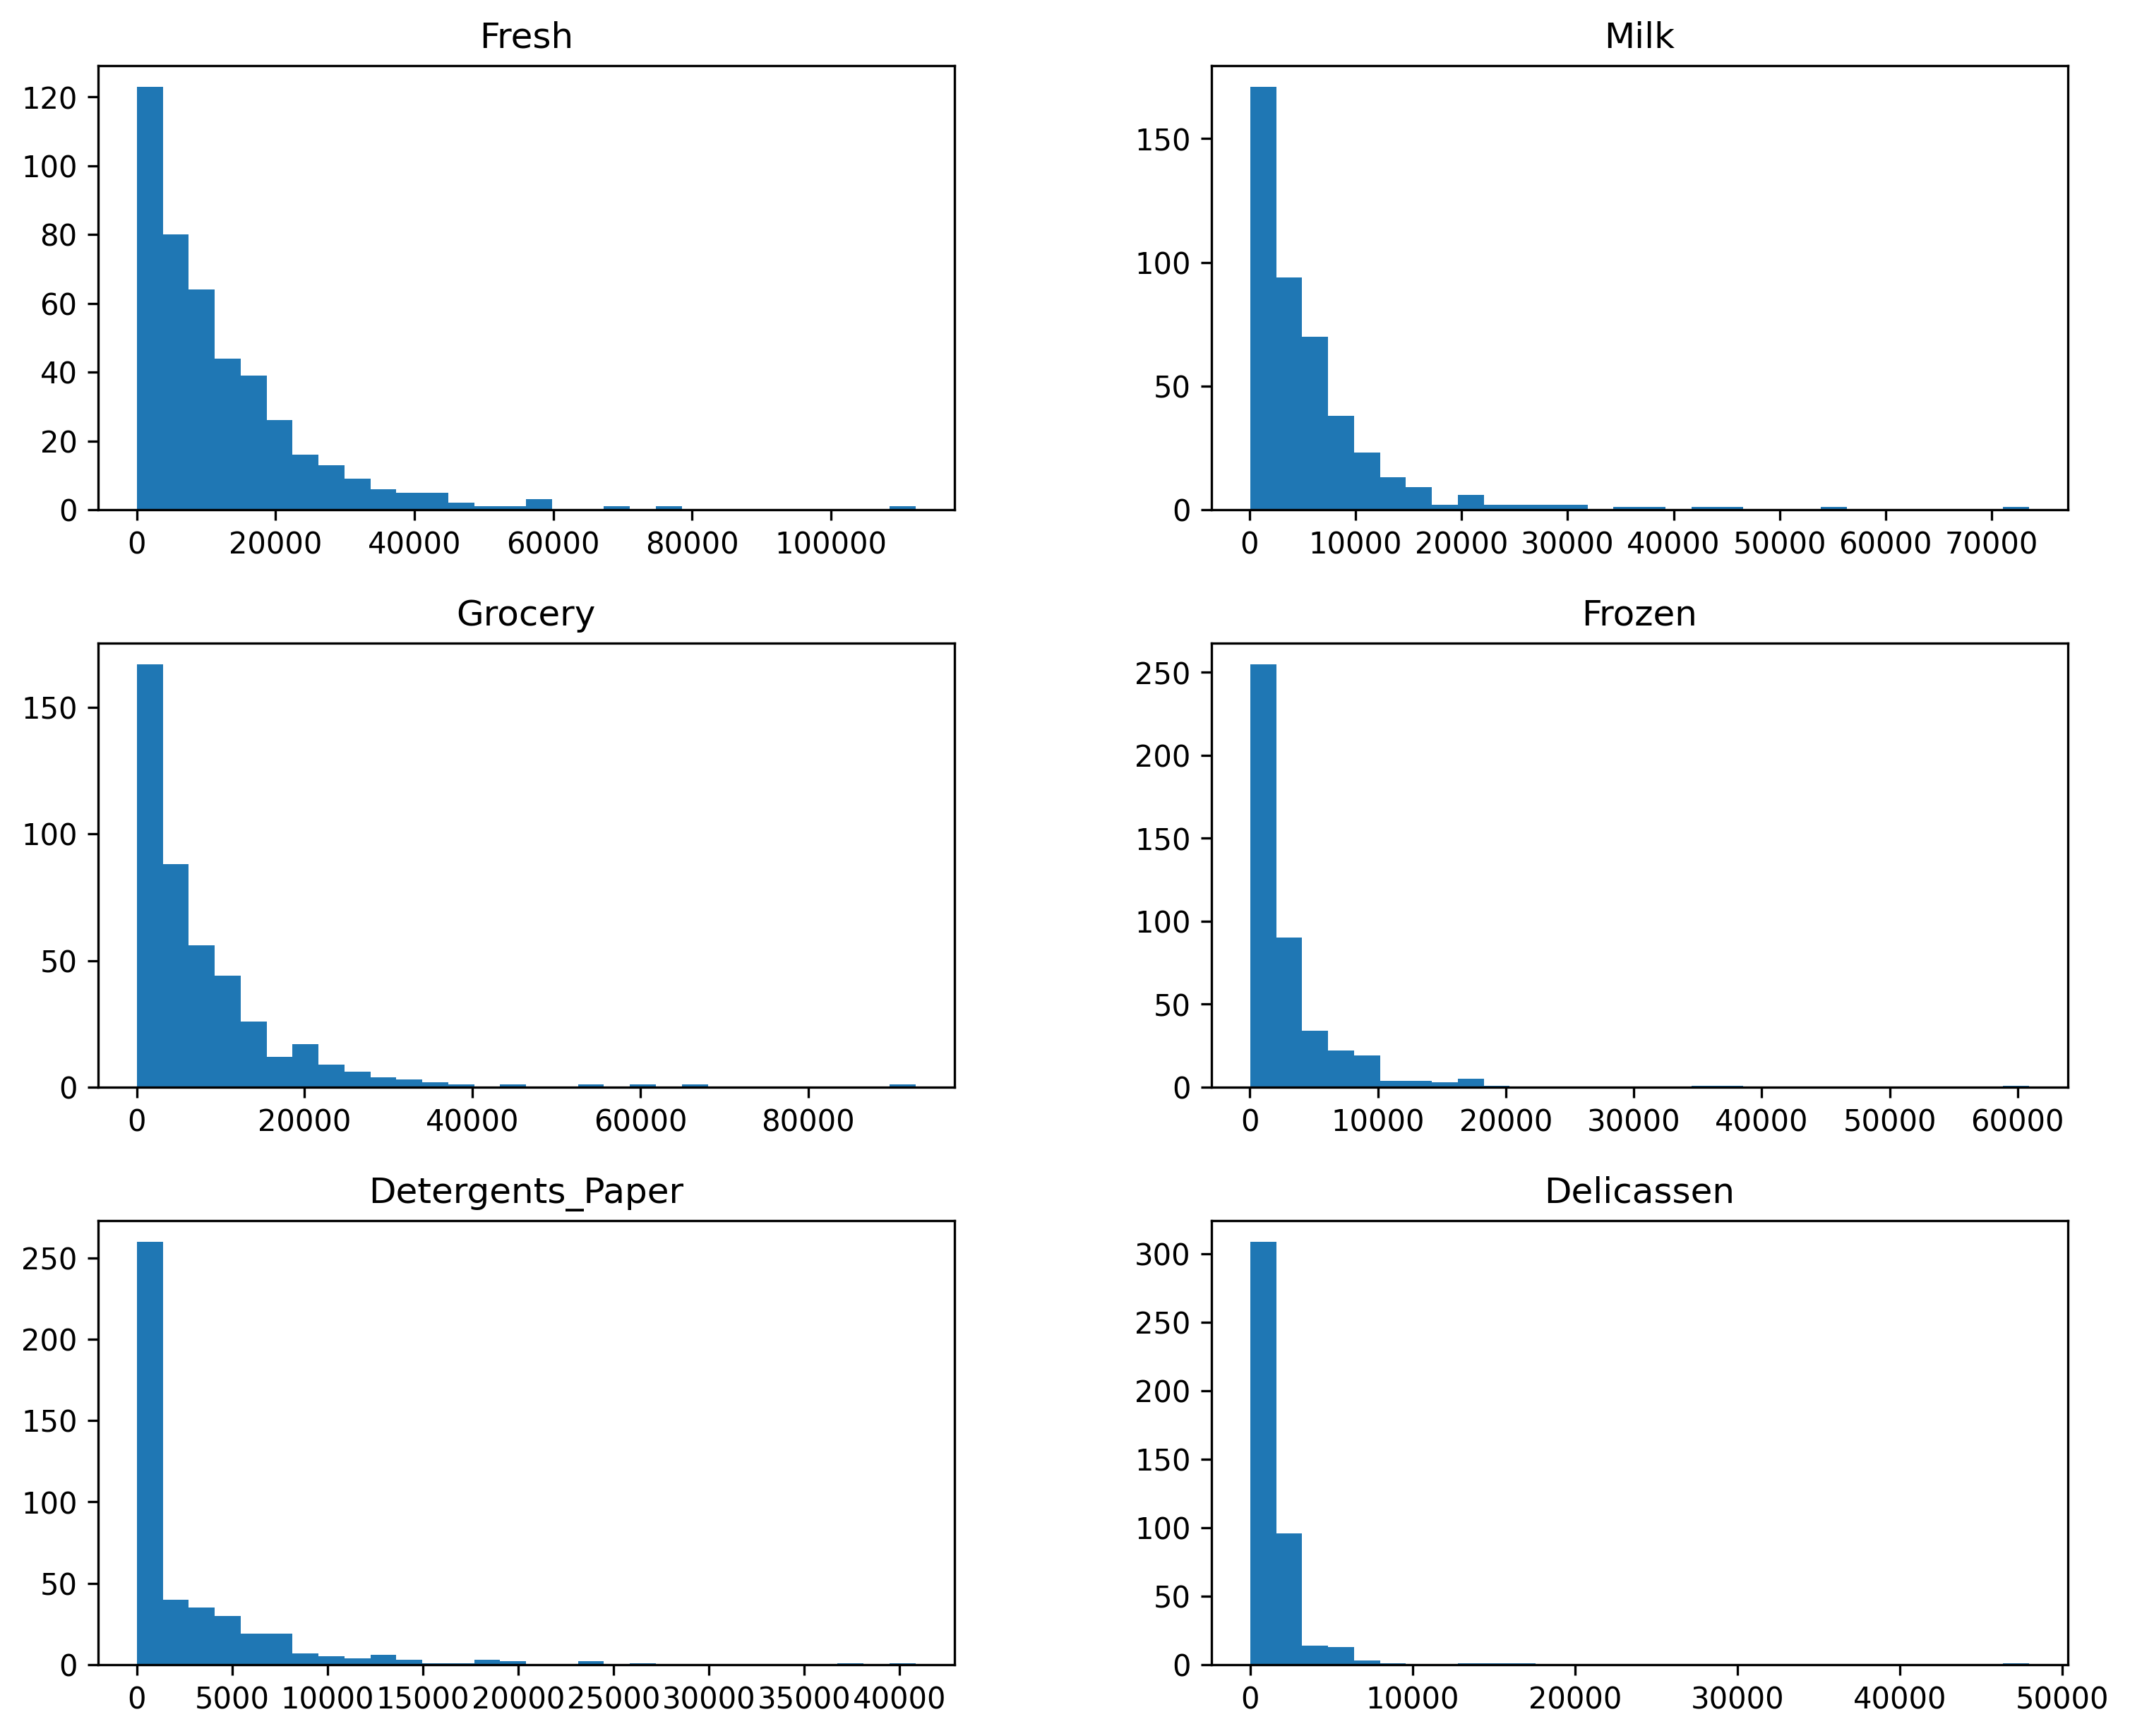

In [5]:
data[numeric].hist(bins=30, figsize=(12,10), grid=False)

plt.show()

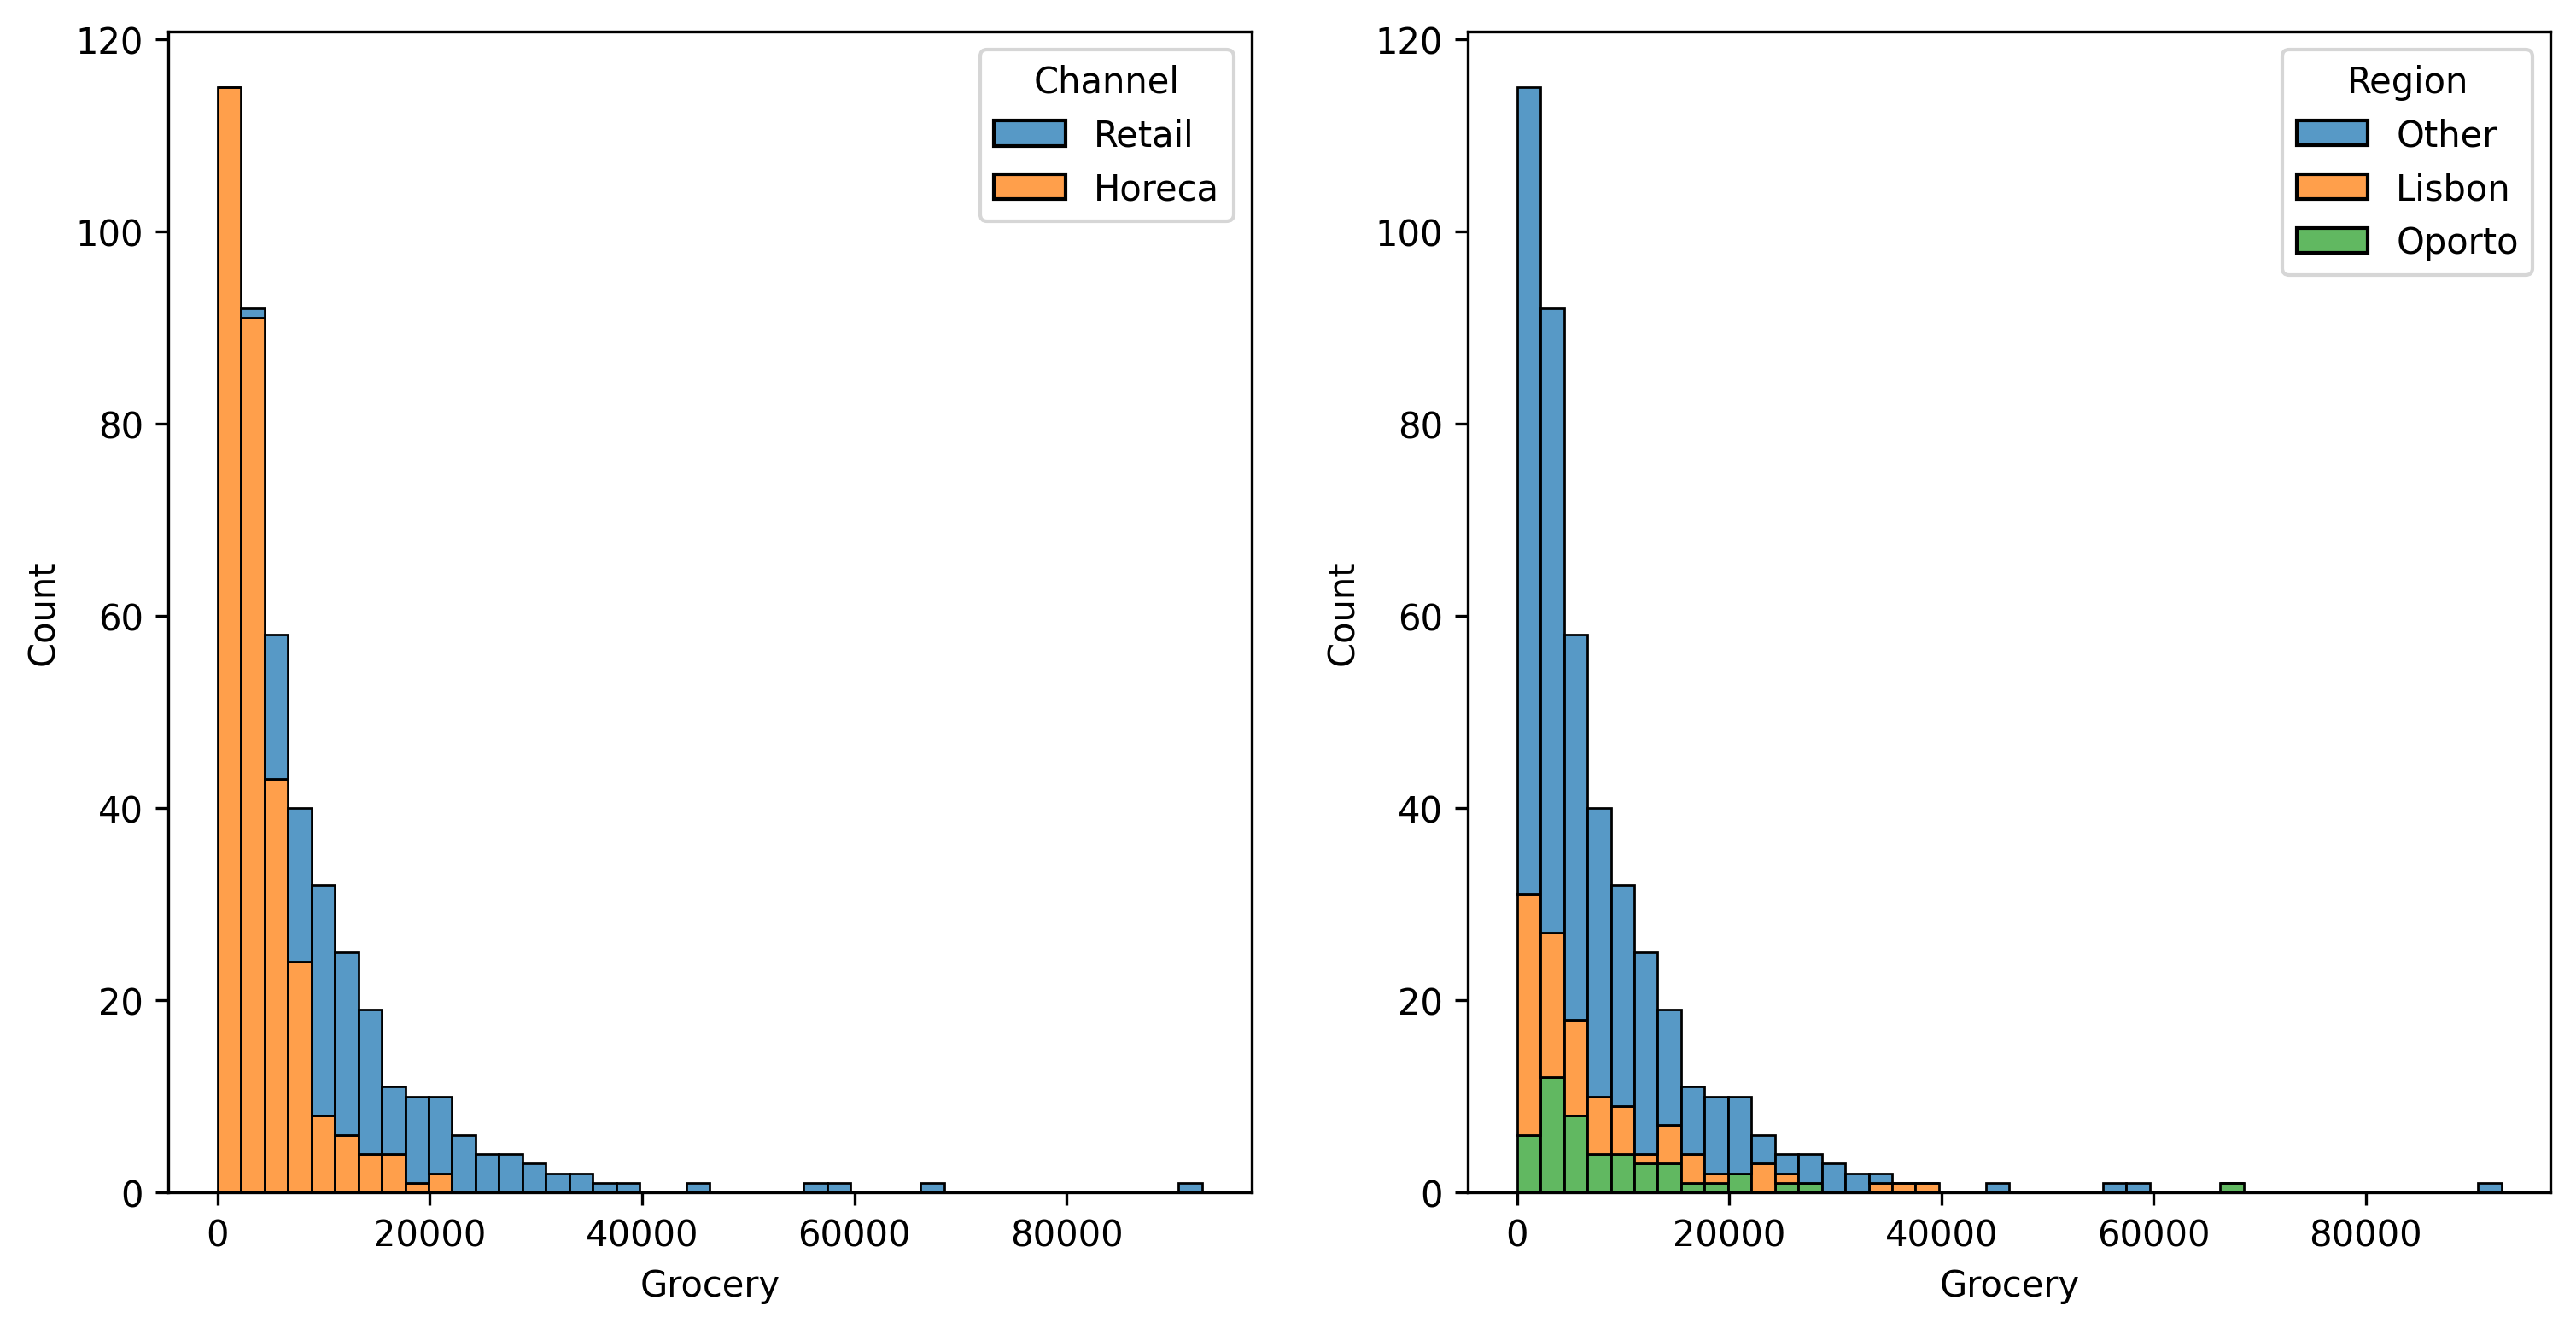

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (12,6))

for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data=data, x ='Grocery', hue=col,
                 multiple='stack', ax=ax)
    
plt.show()

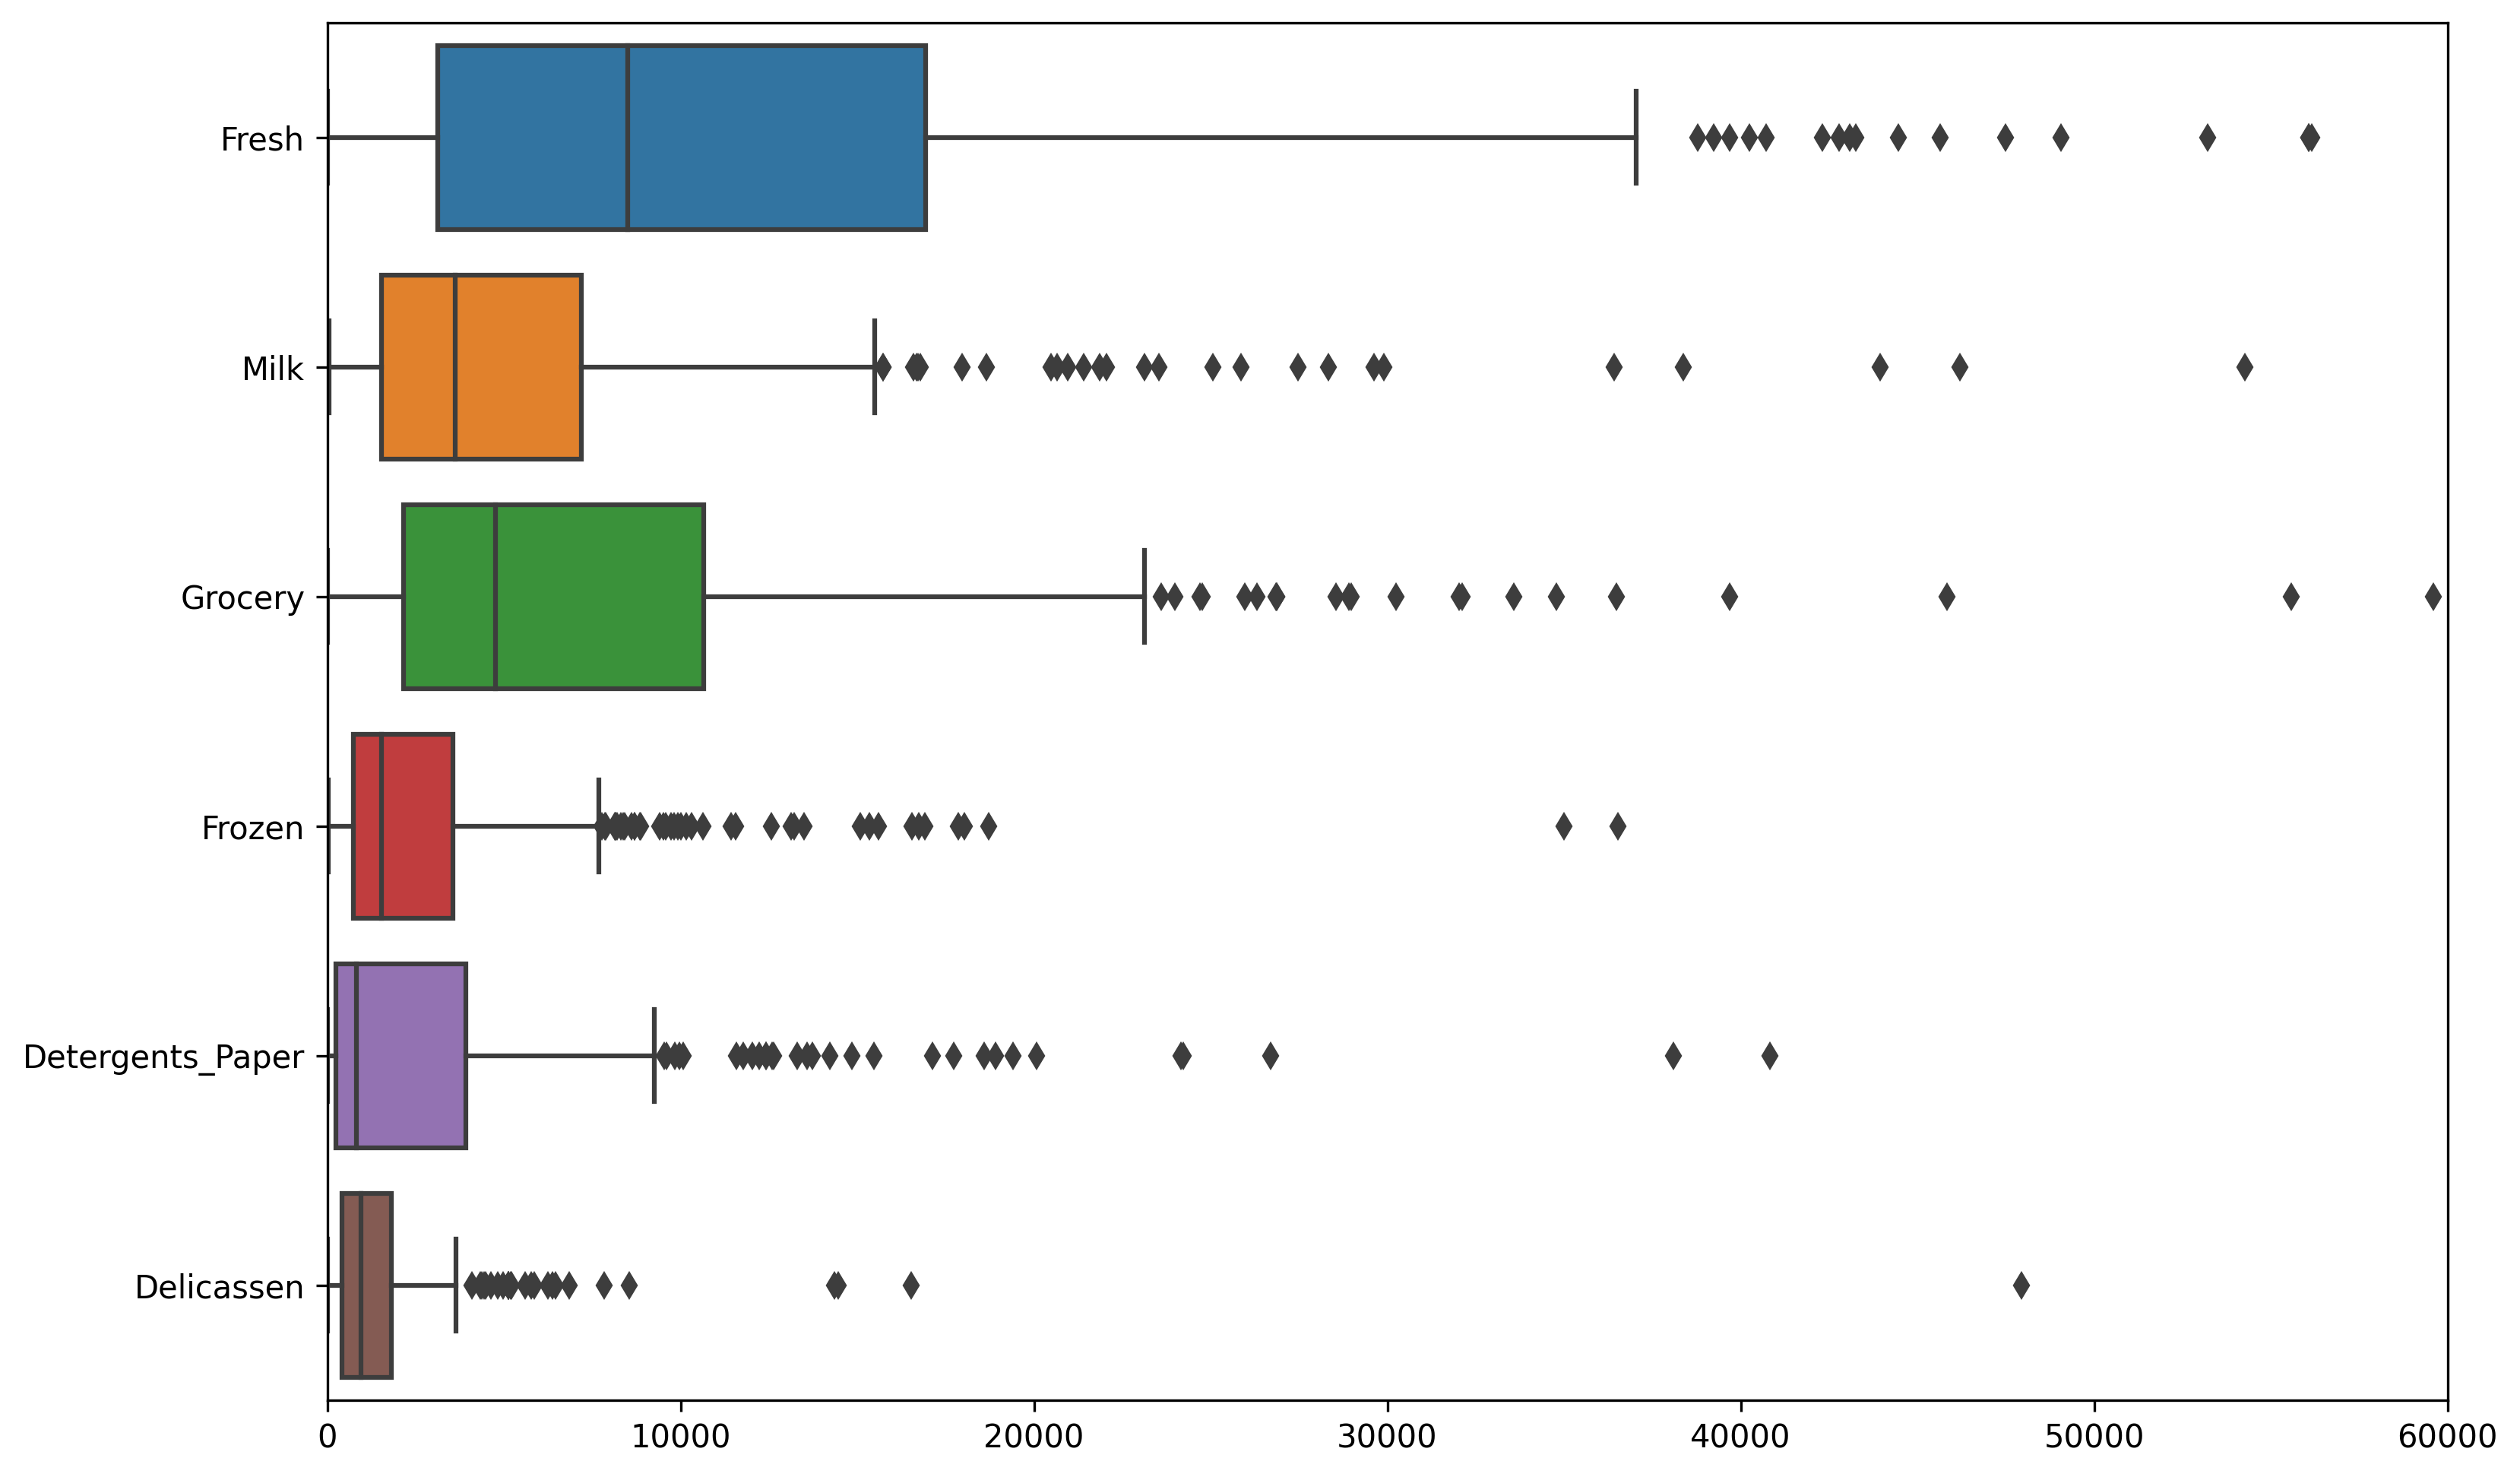

In [7]:
fig, ax = plt.subplots(figsize = (12,8))

sns.boxplot(data=data[numeric], orient='h', ax = ax)
ax.set_xlim(0, 60000)

plt.show()

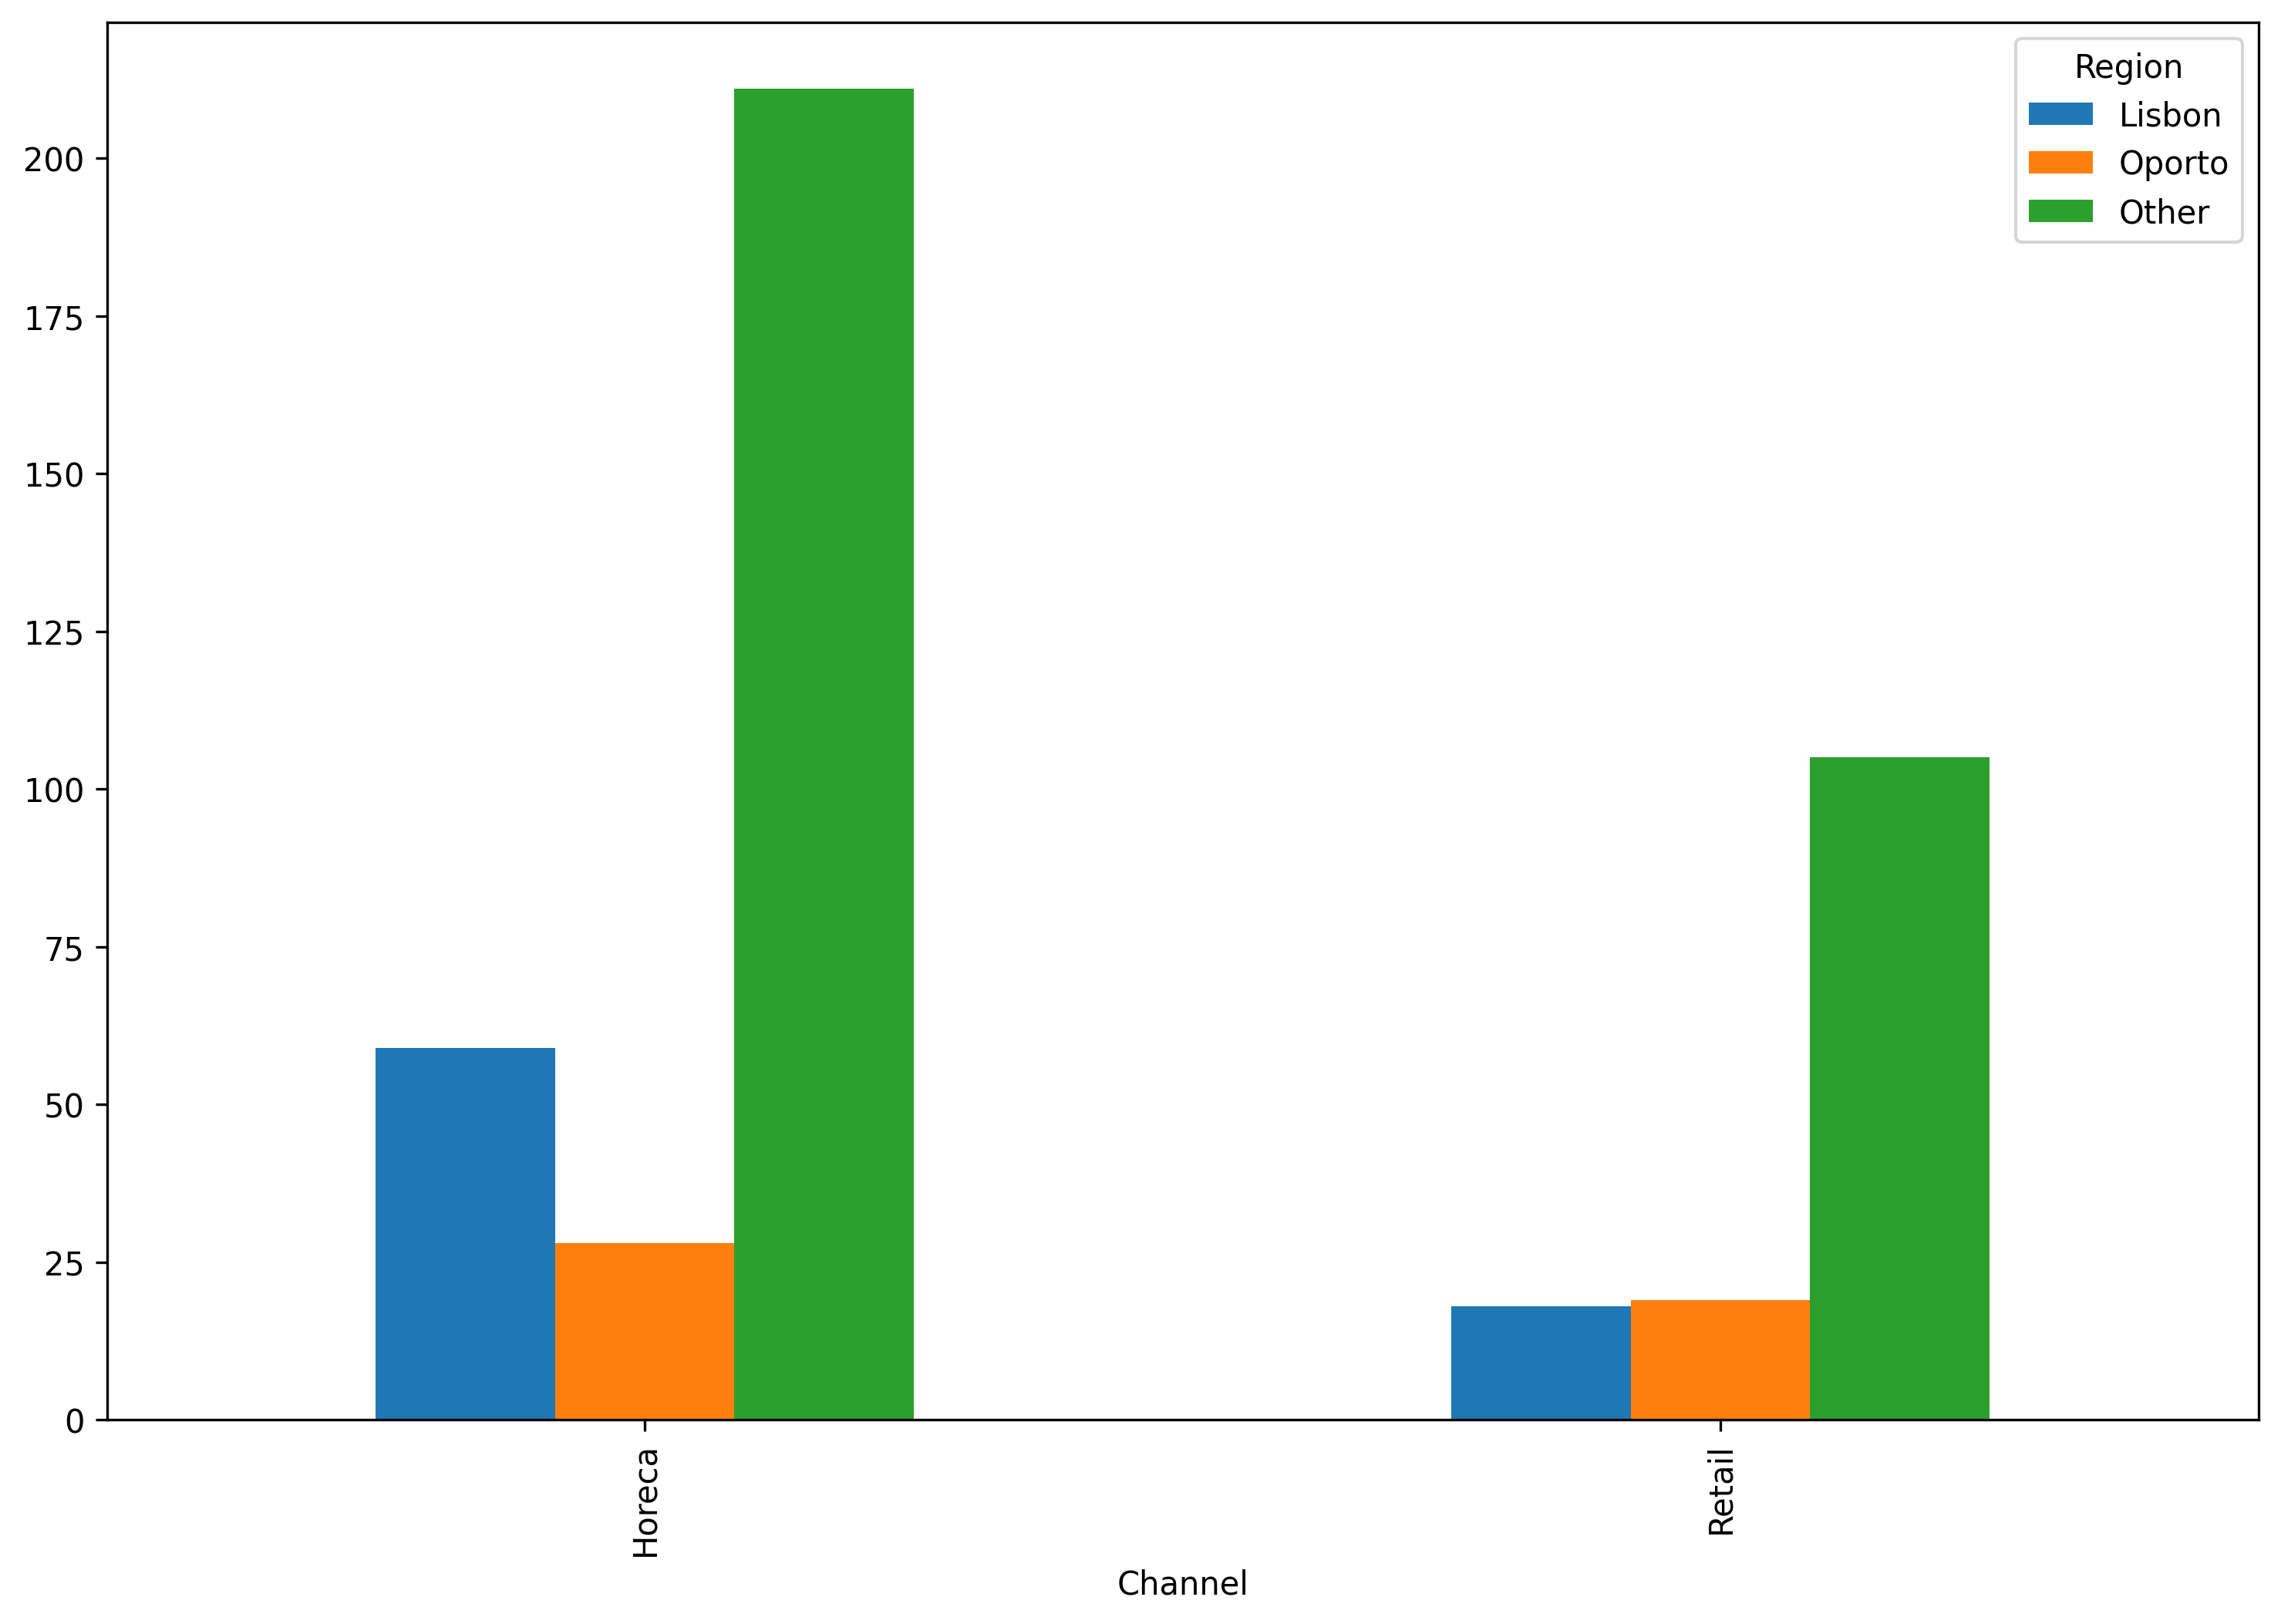

In [8]:
group = data.groupby(['Channel', 'Region']).size().unstack()
group.plot(kind='bar', figsize=(12,8))

plt.show()

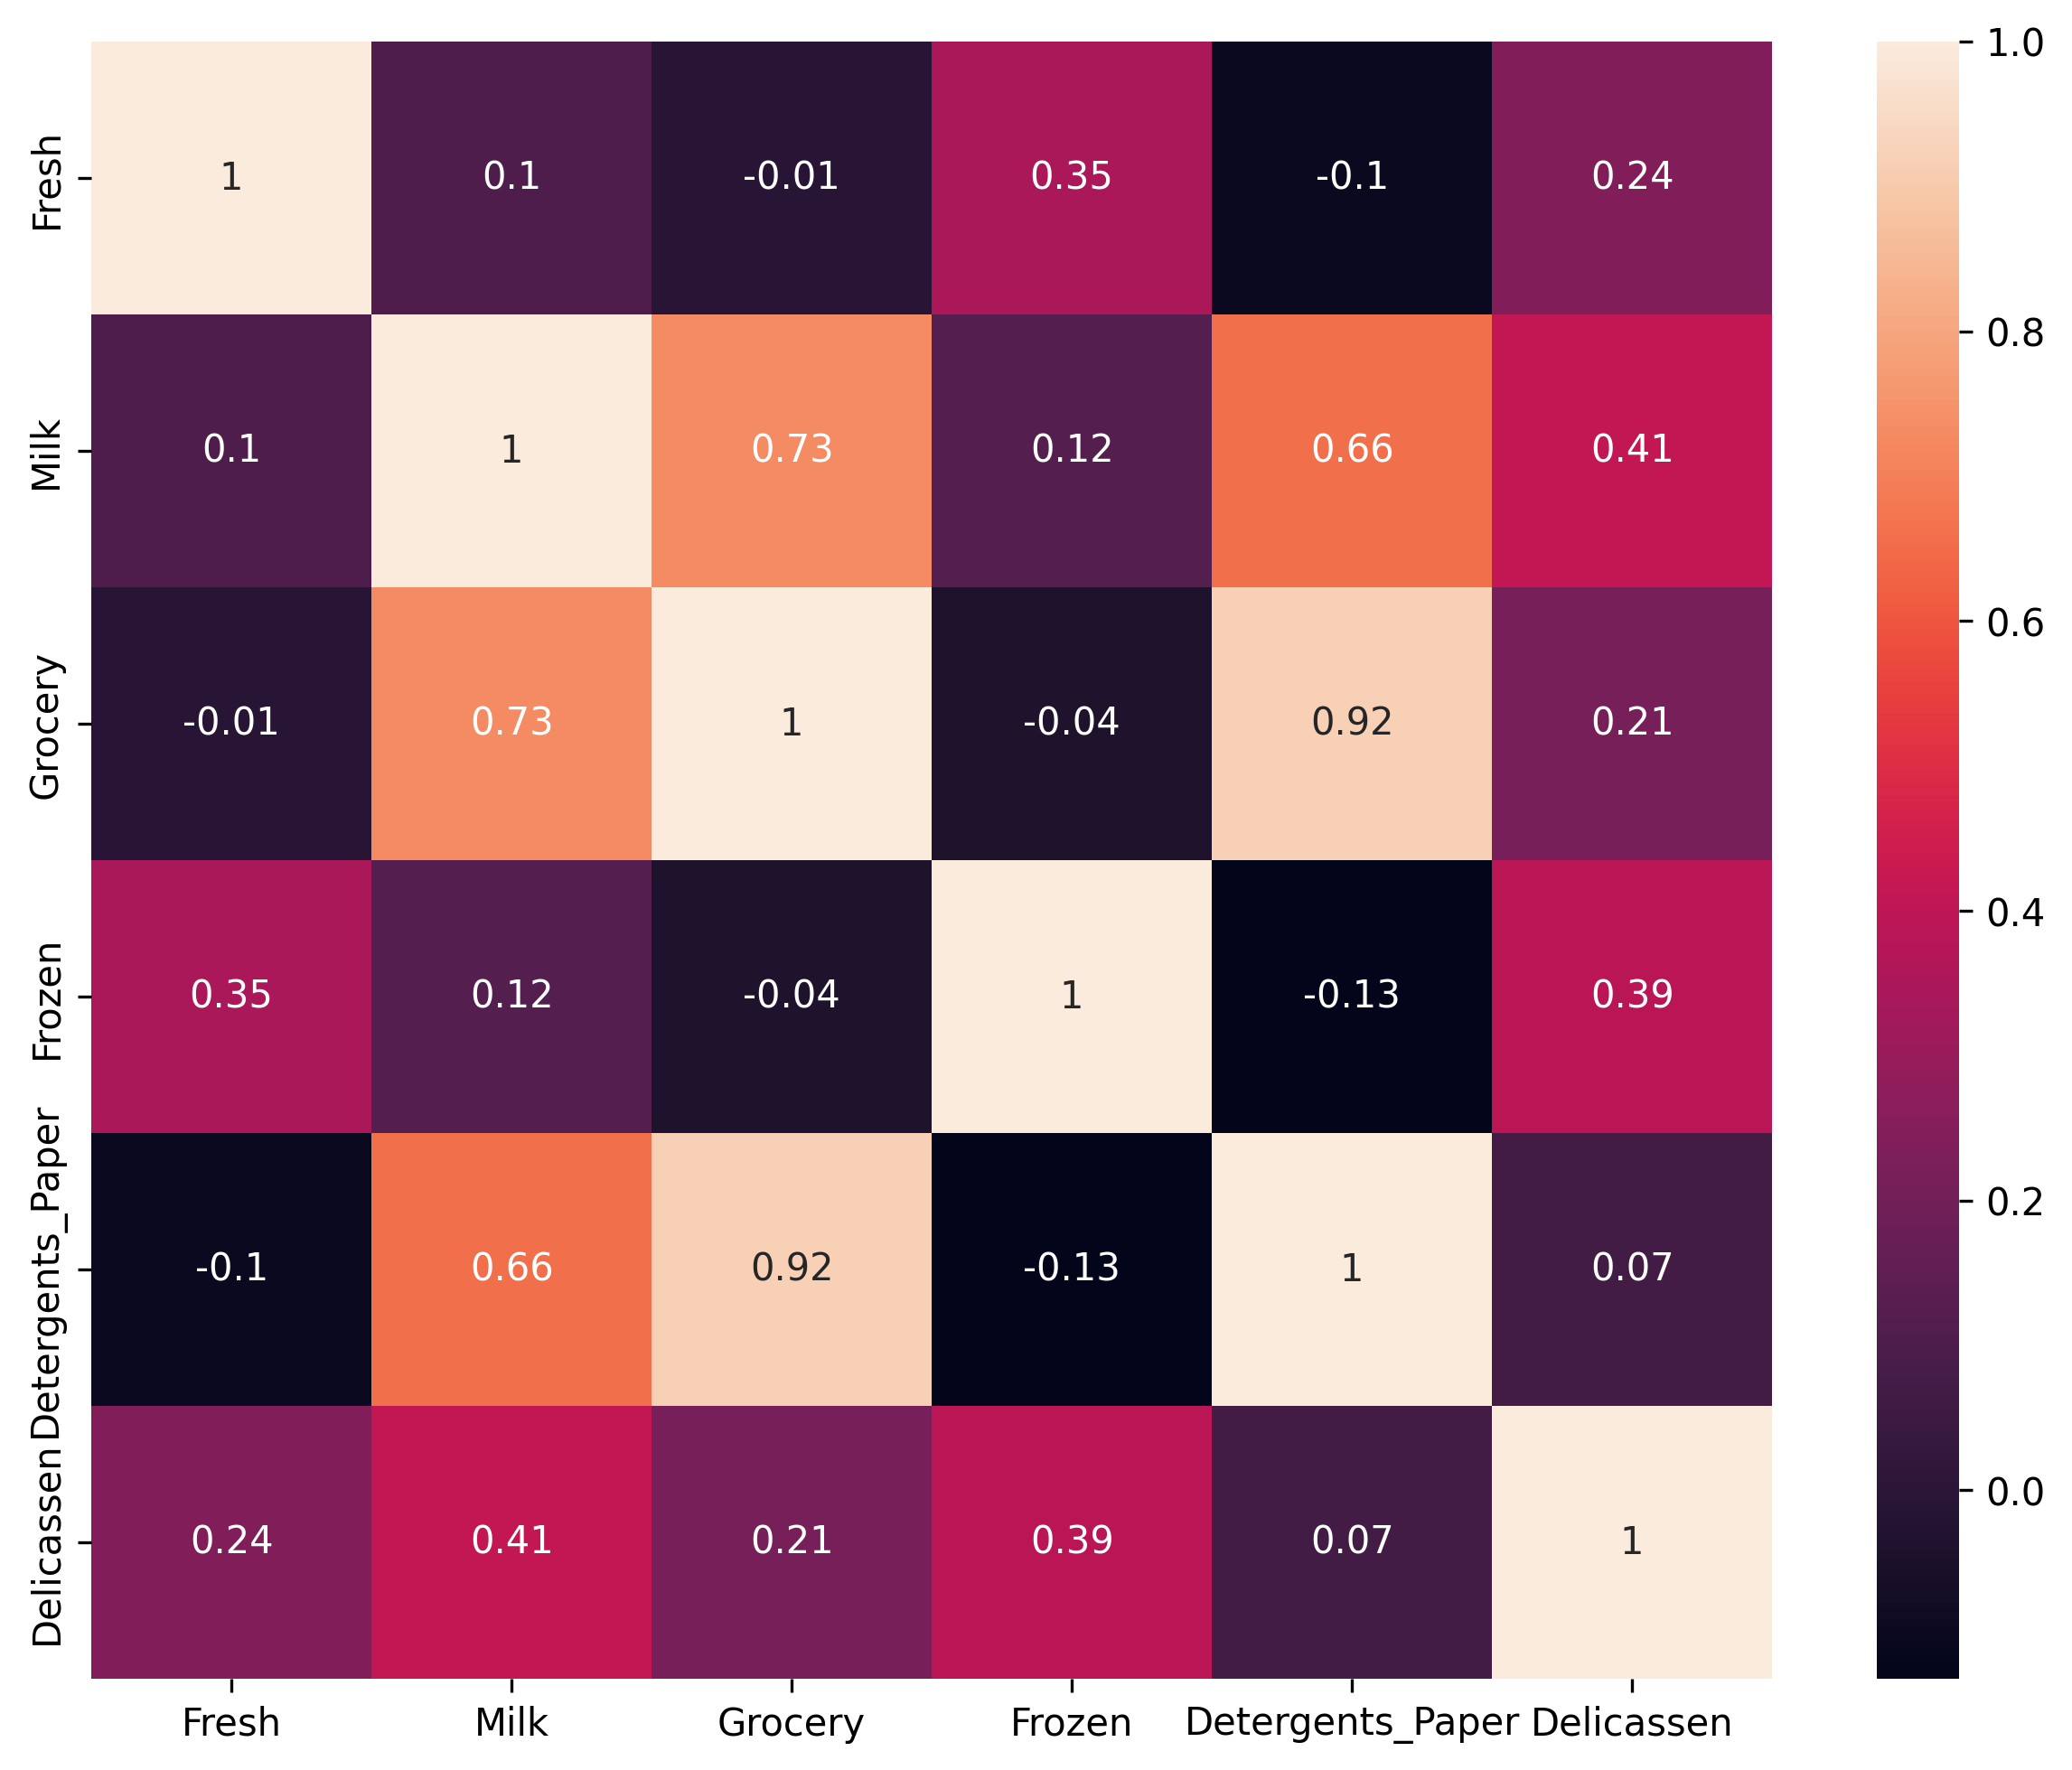

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)

plt.show()

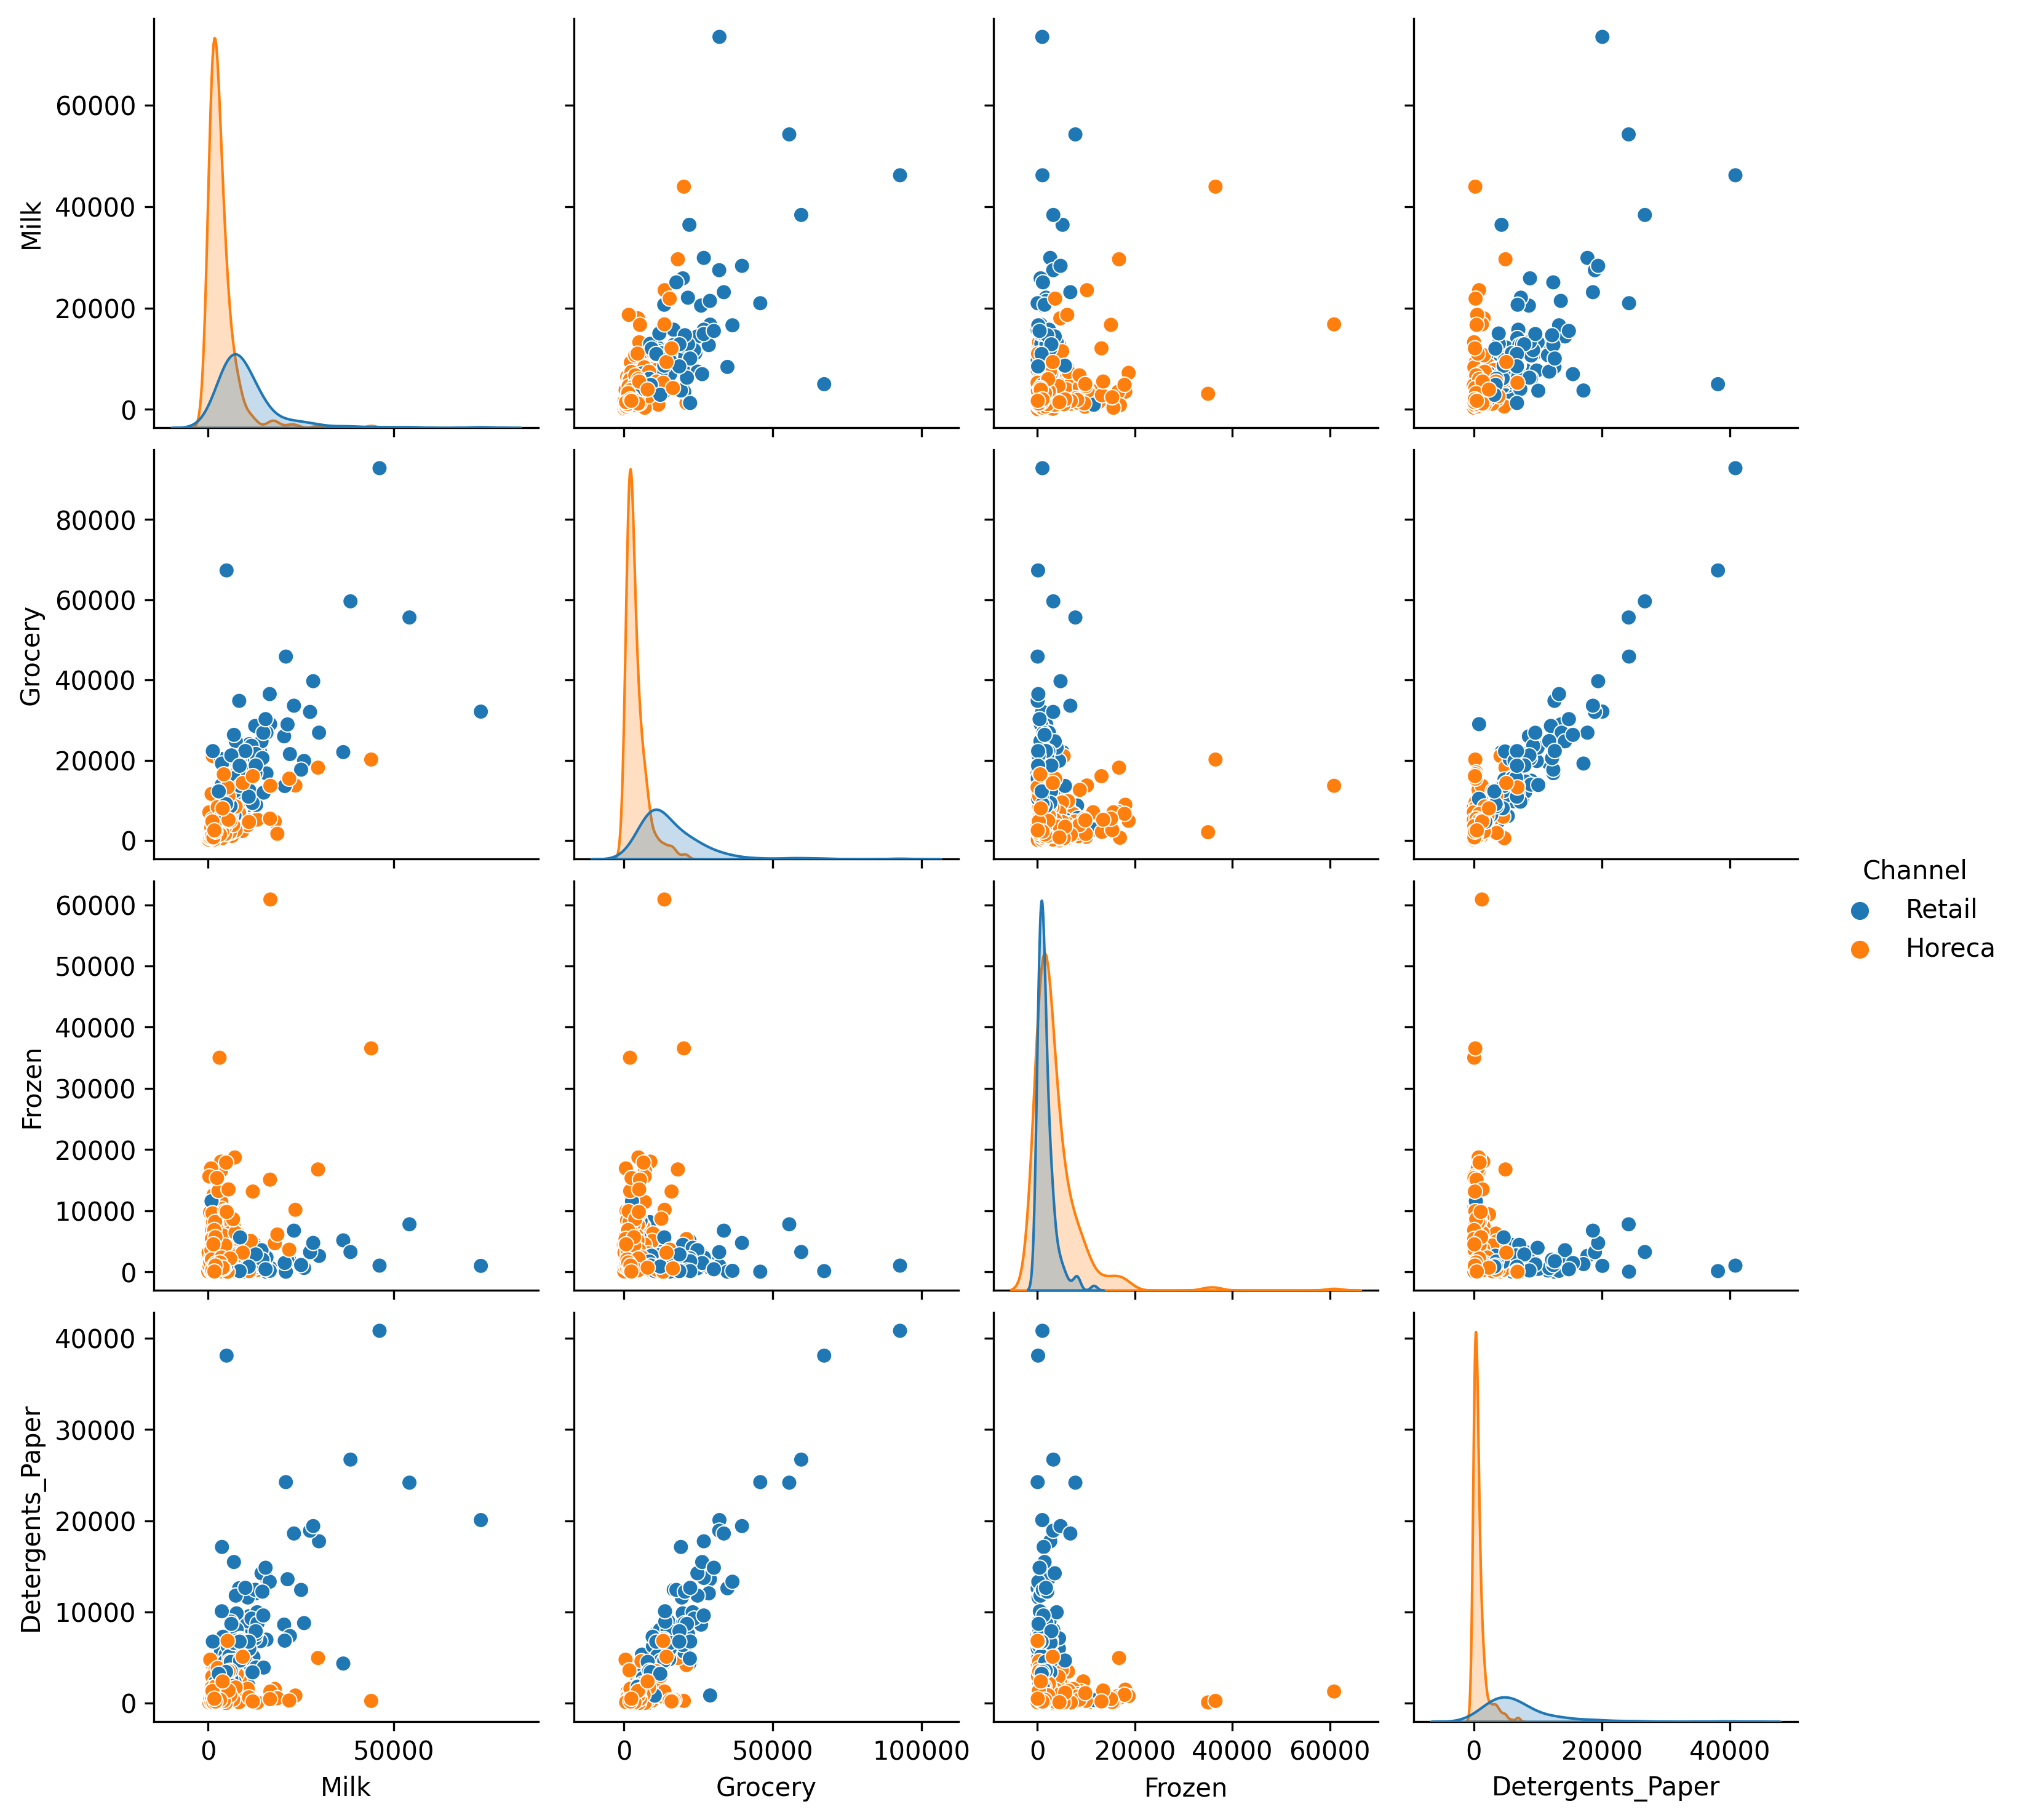

In [10]:
cols = ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper']

sns.pairplot(data, vars=cols, hue='Channel')
plt.show()

### Initializing the PyCaret Environment

In [13]:
anomaly = setup(data, session_id = 8477)

,Description,Value
0,session_id,8477
1,Original Data,"(440, 8)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(440, 11)"
9,CPU Jobs,-1


### Creating and Assigning the Model

In [105]:
model = create_model('lof', fraction = 0.05)

data_assigned = assign_model(model)
data_assigned.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly,Anomaly_Score
0,Retail,Other,12669,9656,7561,214,2674,1338,0,1.107687
1,Retail,Other,7057,9810,9568,1762,3293,1776,0,1.027102
2,Retail,Other,6353,8808,7684,2405,3516,7844,0,1.398439
3,Horeca,Other,13265,1196,4221,6404,507,1788,0,1.200384
4,Retail,Other,22615,5410,7198,3915,1777,5185,0,1.164052
5,Retail,Other,9413,8259,5126,666,1795,1451,0,1.184313
6,Retail,Other,12126,3199,6975,480,3140,545,0,1.130491
7,Retail,Other,7579,4956,9426,1669,3321,2566,0,1.013751
8,Horeca,Other,5963,3648,6192,425,1716,750,0,1.201904
9,Retail,Other,6006,11093,18881,1159,7425,2098,0,1.053333


In [131]:
data_inliers = data_assigned.query('Anomaly == 0')
data_outliers = data_assigned.query('Anomaly == 1')

data_outliers.head(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Anomaly,Anomaly_Score
23,Retail,Other,26373,36423,22019,5154,4337,16523,1,2.249573
47,Retail,Other,44466,54259,55571,7782,24171,6465,1,3.224197
61,Retail,Other,35942,38369,59598,3254,26701,2017,1,2.799411
65,Retail,Other,85,20959,45828,36,24231,1423,1,2.120687
71,Horeca,Other,18291,1266,21042,5373,4173,14472,1,2.273296
85,Retail,Other,16117,46197,92780,1026,40827,2944,1,3.970515
86,Retail,Other,22925,73498,32114,987,20070,903,1,3.435620
93,Horeca,Other,11314,3090,2062,35009,71,2698,1,3.421567
125,Horeca,Other,76237,3473,7102,16538,778,918,1,2.366692
145,Retail,Other,22039,8384,34792,42,12591,4430,1,1.984799


### Evaluating the Model

In [235]:
data_skew = data[numeric].skew()
inliers_skew = data_inliers[numeric].skew()

print("Skewness of original dataset")
print(data_skew.round(decimals=2).to_string())
print("Mean skewness        %0.2f" %data_skew.mean())

print("\nSkewness of inlier dataset")
print(inliers_skew.round(decimals=2).to_string())
print("Mean skewness       %0.2f" %inliers_skew.mean())

Skewness of original dataset
Fresh                2.56
Milk                 4.05
Grocery              3.59
Frozen               5.91
Detergents_Paper     3.63
Delicassen          11.15
Mean skewness        5.15

Skewness of inlier dataset
Fresh               1.61
Milk                1.98
Grocery             1.63
Frozen              2.25
Detergents_Paper    2.09
Delicassen          3.41
Mean skewness       2.16


### Plotting the Model

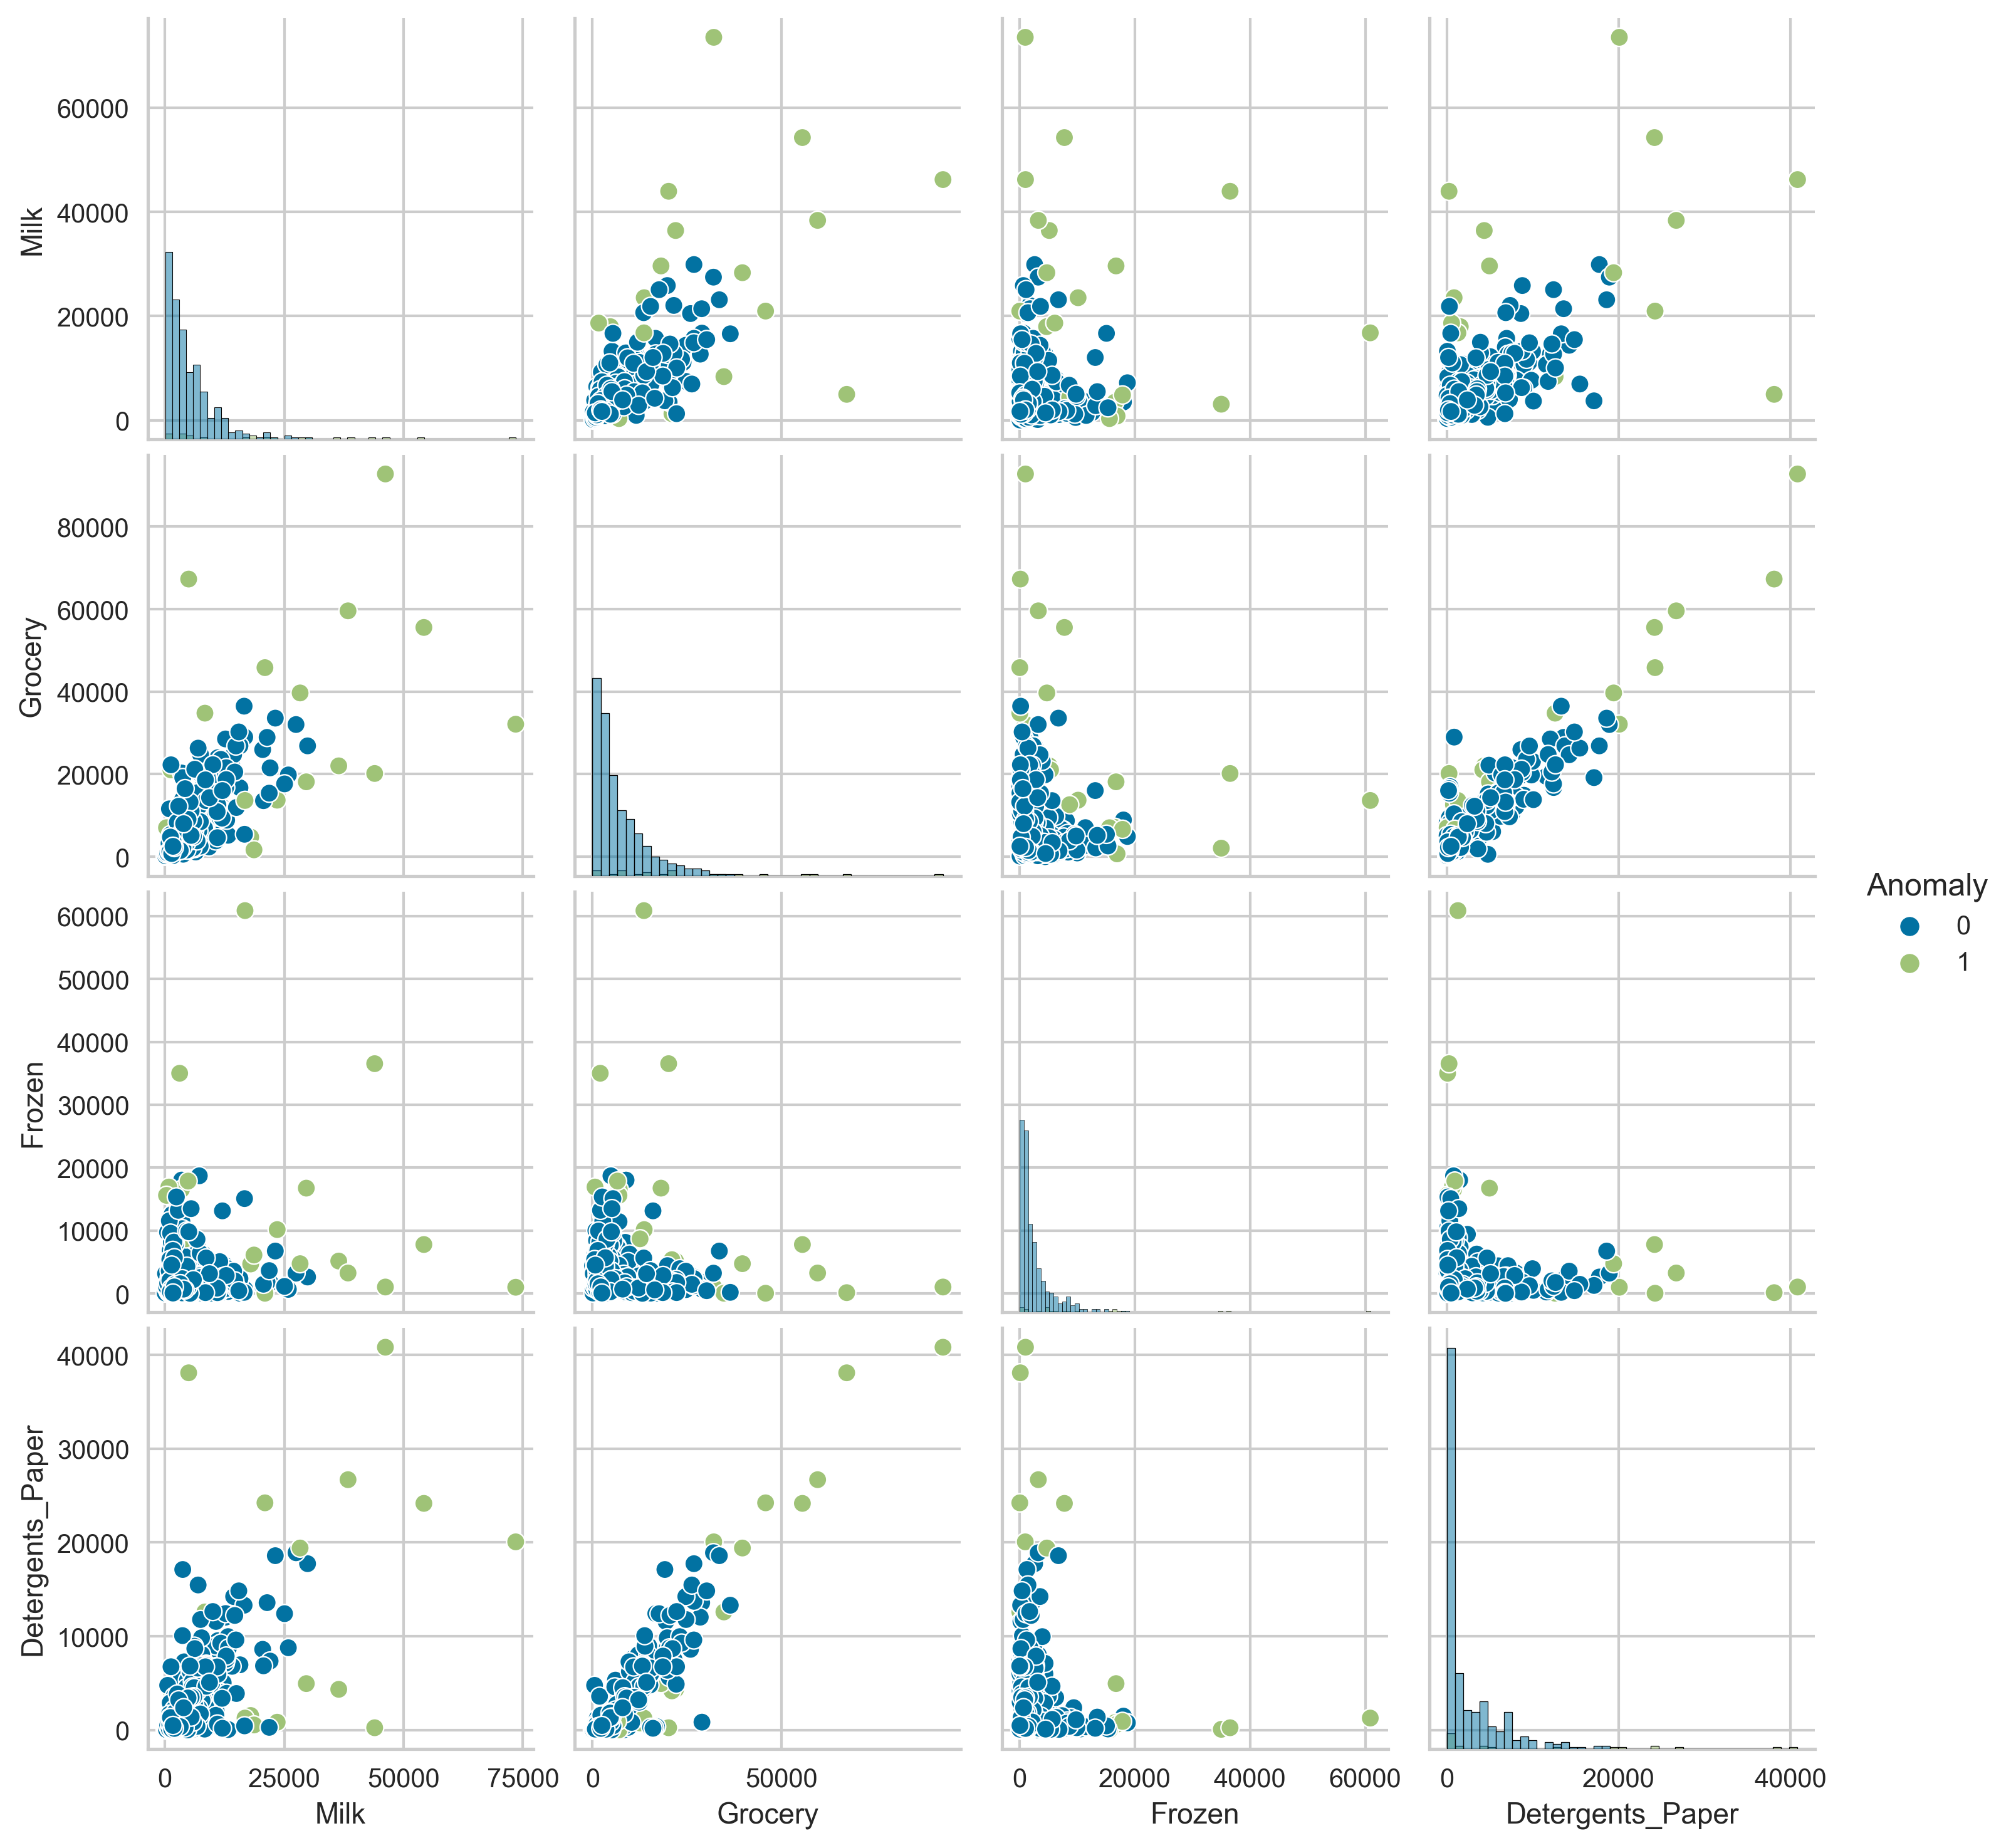

In [121]:
cols = ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper']

sns.pairplot(data_assigned, vars=cols, hue='Anomaly', diag_kind = 'hist')

plt.show()

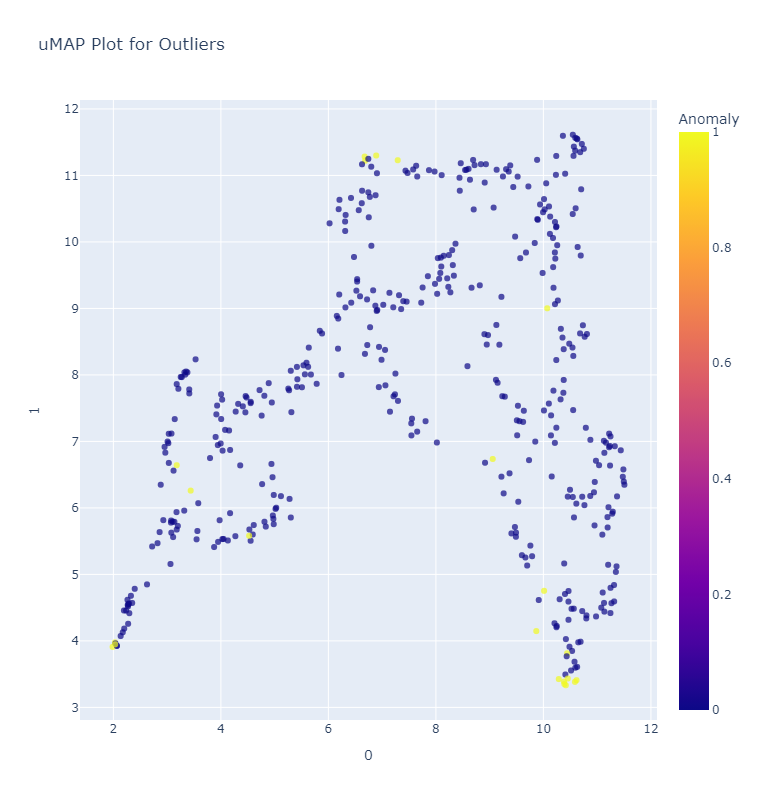

In [21]:
plot_model(model, 'umap')

### Saving the Model

In [26]:
save_model(model, 'anomaly_detection_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('dummy', Dummify(target='UNSUPERVISED_DUMMY_TARGET')),
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca',